## <center>멤버십 고객 탈회 예측</center>

| 컬럼                     | 설명                    | 컬럼                     | 설명                      |
|--------------------------|-------------------------|--------------------------|---------------------------|
| id                       | 멤버십 번호             | MEMBERSHIP_TERM_YEARS    | 멤버십 기간               |
| ANNUAL_FEES              | 연간 회비              | MEMBER_MARITAL_STATUS    | 기혼 여부, M(기혼), S(미혼) |
| MEMBER_GENDER            | 성별, M(남), F(여)     | MEMBER_ANNUAL_INCOME     | 연봉(연간 수입)           |
| MEMBER_OCCUPATION_CD     | 직업                   | MEMBERSHIP_PACKAGE       | 멤버십 유형               |
| MEMBER_AGE_AT_ISSUE      | 나이                   | ADDITIONAL_MEMBERS       | 가족 회원                 |
| PAYMENT_MODE             | 지불 방식              | AGENT_CODE               | 직원 코드                 |
| START_DATE (YYYYMMDD)    | 시작 날짜              | END_DATE  (YYYYMMDD)     | 종료 날짜                 |
| MEMBERSHIP_STATUS        | 0(유지), 1(탈회)       |                           |                           |

### 라이브러리 임포트

In [180]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

### 데이터 불러오기

In [181]:
data = pd.read_csv("../Module03_머신러닝/membership.csv")
print(data.shape)
data.head()

(8807, 15)


,id,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE,END_DATE
0,0,22,100000.00,M,M,450000.0,1.0,TYPE-B,27,1,ANNUAL,666099,0,20091029,NaN
1,1,88,149029.58,NaN,M,NaN,6.0,TYPE-A,75,0,ANNUAL,132000,0,20131014,NaN
2,2,93,102999.94,NaN,M,600000.0,1.0,TYPE-A,49,0,ANNUAL,1407177,0,20130531,NaN
3,3,17,147576.48,M,F,450000.0,1.0,TYPE-A,47,3,MONTHLY,343344,0,20130331,NaN
4,4,39,100000.00,M,M,600000.0,1.0,TYPE-B,36,3,ANNUAL,119199,0,20080313,NaN


### 데이터 탐색 (EDA)

### 데이터프레임 기본 정보

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     8807 non-null   int64  
 1   MEMBERSHIP_TERM_YEARS  8807 non-null   int64  
 2   ANNUAL_FEES            8807 non-null   float64
 3   MEMBER_MARITAL_STATUS  6597 non-null   object 
 4   MEMBER_GENDER          8305 non-null   object 
 5   MEMBER_ANNUAL_INCOME   7338 non-null   float64
 6   MEMBER_OCCUPATION_CD   8773 non-null   float64
 7   MEMBERSHIP_PACKAGE     8807 non-null   object 
 8   MEMBER_AGE_AT_ISSUE    8807 non-null   int64  
 9   ADDITIONAL_MEMBERS     8807 non-null   int64  
 10  PAYMENT_MODE           8807 non-null   object 
 11  AGENT_CODE             8807 non-null   object 
 12  MEMBERSHIP_STATUS      8807 non-null   int64  
 13  START_DATE             8807 non-null   int64  
 14  END_DATE               2671 non-null   float64
dtypes: f

### 통계정보 요약

In [183]:
data.describe(include='all')

,id,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE,END_DATE
count,8807.000000,8807.000000,8.807000e+03,6597,8305,7.338000e+03,8773.000000,8807,8807.000000,8807.000000,8807,8807,8807.000000,8.807000e+03,2.671000e+03
unique,NaN,NaN,NaN,4,2,NaN,NaN,2,NaN,NaN,5,3915,NaN,NaN,NaN
top,NaN,NaN,NaN,M,M,NaN,NaN,TYPE-B,NaN,NaN,ANNUAL,343344,NaN,NaN,NaN
freq,NaN,NaN,NaN,5455,6249,NaN,NaN,5744,NaN,NaN,5592,504,NaN,NaN,NaN
mean,4403.000000,29.518451,1.806998e+05,NaN,NaN,1.375036e+06,1.711159,NaN,46.766322,1.412967,NaN,NaN,0.303281,2.010835e+07,2.011390e+07
std,2542.506244,22.584187,2.854986e+05,NaN,NaN,1.499773e+07,1.449801,NaN,13.909048,1.146395,NaN,NaN,0.459702,1.727042e+04,1.395780e+04
min,0.000000,9.000000,0.000000e+00,NaN,NaN,9.996000e+03,1.000000,NaN,0.000000,0.000000,NaN,NaN,0.000000,2.006091e+07,2.007083e+07
25%,2201.500000,12.000000,1.000000e+05,NaN,NaN,3.999960e+05,1.000000,NaN,37.000000,0.000000,NaN,NaN,0.000000,2.009123e+07,2.010121e+07
50%,4403.000000,19.000000,1.191941e+05,NaN,NaN,5.499960e+05,1.000000,NaN,46.000000,1.000000,NaN,NaN,0.000000,2.011011e+07,2.011121e+07
75%,6604.500000,37.000000,1.909890e+05,NaN,NaN,9.999960e+05,2.000000,NaN,57.000000,2.000000,NaN,NaN,1.000000,2.012123e+07,2.013020e+07


### 중복행 개수

In [184]:
data.duplicated().sum()

0

### 결측치 개수

In [185]:
data.isnull().sum()

id                          0
MEMBERSHIP_TERM_YEARS       0
ANNUAL_FEES                 0
MEMBER_MARITAL_STATUS    2210
MEMBER_GENDER             502
MEMBER_ANNUAL_INCOME     1469
MEMBER_OCCUPATION_CD       34
MEMBERSHIP_PACKAGE          0
MEMBER_AGE_AT_ISSUE         0
ADDITIONAL_MEMBERS          0
PAYMENT_MODE                0
AGENT_CODE                  0
MEMBERSHIP_STATUS           0
START_DATE                  0
END_DATE                 6136
dtype: int64

In [186]:
data['MEMBERSHIP_STATUS'].value_counts()
# END_DATE 결측치와 0 값이 동일 : 멤버쉽인 경우만 END_DATE 가 있다.

MEMBERSHIP_STATUS
0    6136
1    2671
Name: count, dtype: int64

### 데이터 전처리 (Preprocessing)

### 컬럼명 변경

In [187]:
data.columns

Index(['id', 'MEMBERSHIP_TERM_YEARS', 'ANNUAL_FEES', 'MEMBER_MARITAL_STATUS',
       'MEMBER_GENDER', 'MEMBER_ANNUAL_INCOME', 'MEMBER_OCCUPATION_CD',
       'MEMBERSHIP_PACKAGE', 'MEMBER_AGE_AT_ISSUE', 'ADDITIONAL_MEMBERS',
       'PAYMENT_MODE', 'AGENT_CODE', 'MEMBERSHIP_STATUS', 'START_DATE',
       'END_DATE'],
      dtype='object')

In [188]:
data.columns = ['id', 'term', 'fee', 'married', 'gender', 'income', 'job',
'package', 'age', 'family', 'payment', 'agent', 'target', 'start_date', 'end_date']

In [189]:
data.head()

,id,term,fee,married,gender,income,job,package,age,family,payment,agent,target,start_date,end_date
0,0,22,100000.00,M,M,450000.0,1.0,TYPE-B,27,1,ANNUAL,666099,0,20091029,NaN
1,1,88,149029.58,NaN,M,NaN,6.0,TYPE-A,75,0,ANNUAL,132000,0,20131014,NaN
2,2,93,102999.94,NaN,M,600000.0,1.0,TYPE-A,49,0,ANNUAL,1407177,0,20130531,NaN
3,3,17,147576.48,M,F,450000.0,1.0,TYPE-A,47,3,MONTHLY,343344,0,20130331,NaN
4,4,39,100000.00,M,M,600000.0,1.0,TYPE-B,36,3,ANNUAL,119199,0,20080313,NaN


### 결측값 처리

In [190]:
data.isnull().sum()

id               0
term             0
fee              0
married       2210
gender         502
income        1469
job             34
package          0
age              0
family           0
payment          0
agent            0
target           0
start_date       0
end_date      6136
dtype: int64

### 결측값 제거

In [191]:
# end_date 열 삭제
data = data.drop(['end_date'], axis=1)

In [192]:
# 결측치가 있는 행 제거
data.dropna(how='any')

,id,term,fee,married,gender,income,job,package,age,family,payment,agent,target,start_date
0,0,22,100000.00,M,M,450000.0,1.0,TYPE-B,27,1,ANNUAL,666099,0,20091029
3,3,17,147576.48,M,F,450000.0,1.0,TYPE-A,47,3,MONTHLY,343344,0,20130331
4,4,39,100000.00,M,M,600000.0,1.0,TYPE-B,36,3,ANNUAL,119199,0,20080313
6,6,17,103016.16,S,M,999996.0,2.0,TYPE-A,35,0,MONTHLY,348099,0,20130930
9,9,12,300002.40,M,M,349992.0,1.0,TYPE-B,46,2,MONTHLY,1360477,1,20121130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,8801,12,100000.00,M,M,300000.0,2.0,TYPE-B,37,2,ANNUAL,1296622,1,20120806
8803,8803,49,100000.00,M,M,399996.0,1.0,TYPE-B,46,1,ANNUAL,841477,0,20100208
8804,8804,54,600001.16,M,M,2250000.0,2.0,TYPE-A,51,3,ANNUAL,1347855,0,20130331
8805,8805,27,100000.00,M,M,600000.0,1.0,TYPE-B,27,2,ANNUAL,798833,0,20100127


### 평균값 대체

In [193]:
# income
data['income'].value_counts(dropna=False)

income
NaN          1469
399996.0      518
999996.0      512
300000.0      489
600000.0      458
             ... 
209448.0        1
520860.0        1
161220.0        1
341508.0        1
2250000.0       1
Name: count, Length: 720, dtype: int64

In [194]:
# 결측치를 직업별 평균값으로 대체
data['income'] = data['income'].fillna(data.groupby('job')['income'].transform('mean'))
data['income'].isnull().sum() # 직업 결측치가 있기 때문에 결측치 16개 발생

16

In [195]:
# 결측치를 평균값으로 대체
data['income'] = data['income'].fillna(data['income'].mean()) # 따라서 전체 평균값으로 대체
data['income'].isnull().sum()

0

### 로그 변환

<Axes: >

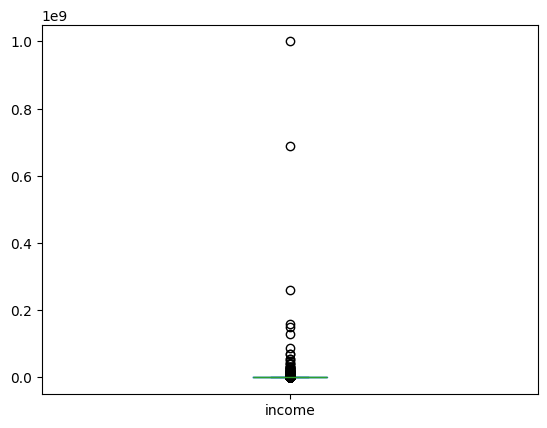

In [196]:
data['income'].plot(kind='box')

In [197]:
data['income']

0       4.500000e+05
1       5.447566e+05
2       6.000000e+05
3       4.500000e+05
4       6.000000e+05
            ...     
8802    1.333332e+06
8803    3.999960e+05
8804    2.250000e+06
8805    6.000000e+05
8806    2.000004e+06
Name: income, Length: 8807, dtype: float64

<Axes: ylabel='Frequency'>

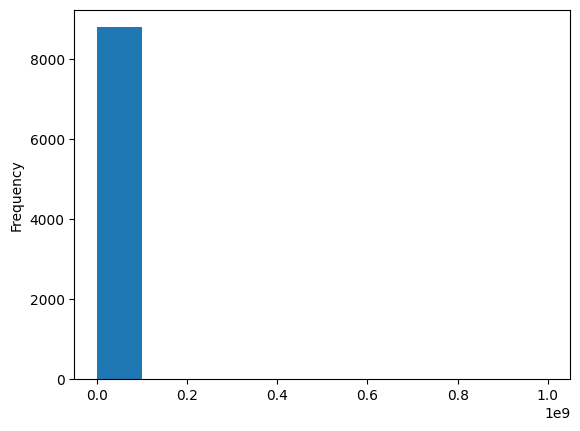

In [198]:
data['income'].plot(kind='hist')

(array([3.000e+00, 7.000e+00, 1.241e+03, 4.840e+03, 2.404e+03, 2.500e+02,
        4.700e+01, 9.000e+00, 4.000e+00, 2.000e+00]),
 array([ 9.21004033, 10.36136288, 11.51268543, 12.66400798, 13.81533053,
        14.96665308, 16.11797563, 17.26929818, 18.42062073, 19.57194328,
        20.72326583]),
 <BarContainer object of 10 artists>)

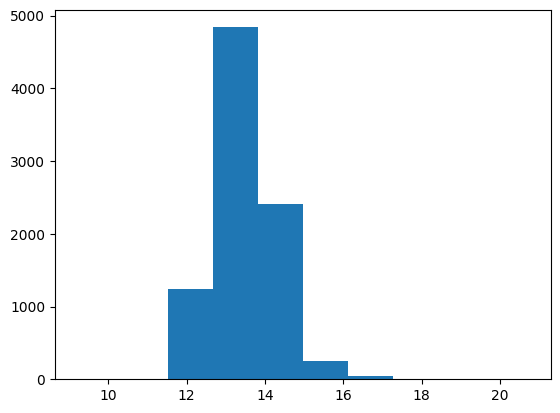

In [199]:
plt.hist(np.log1p(data['income']))

In [200]:
data['income_log'] = np.log1p(data['income'])
data.head()
# start_date : 날짜로 인식할수 있게 to_datetime 으로 변환하거나 가입 후 지난 날짜를 계산한 변수로 변경

,id,term,fee,married,gender,income,job,package,age,family,payment,agent,target,start_date,income_log
0,0,22,100000.00,M,M,450000.000000,1.0,TYPE-B,27,1,ANNUAL,666099,0,20091029,13.017005
1,1,88,149029.58,NaN,M,544756.571429,6.0,TYPE-A,75,0,ANNUAL,132000,0,20131014,13.208096
2,2,93,102999.94,NaN,M,600000.000000,1.0,TYPE-A,49,0,ANNUAL,1407177,0,20130531,13.304687
3,3,17,147576.48,M,F,450000.000000,1.0,TYPE-A,47,3,MONTHLY,343344,0,20130331,13.017005
4,4,39,100000.00,M,M,600000.000000,1.0,TYPE-B,36,3,ANNUAL,119199,0,20080313,13.304687


### 최빈값 대체

In [201]:
data['gender'].value_counts(dropna=False)

gender
M      6249
F      2056
NaN     502
Name: count, dtype: int64

In [202]:
data['gender'].mode()[0]

'M'

In [203]:
data['married'].value_counts(dropna=False)

married
M      5455
NaN    2210
S       977
W       128
D        37
Name: count, dtype: int64

In [204]:
data['married'].mode()[0]

'M'

In [205]:
data['gender'] = data['gender'].fillna(data['gender'].mode()[0])
data['married'] = data['married'].fillna(data['married'].mode()[0])

data.isnull().sum()

id             0
term           0
fee            0
married        0
gender         0
income         0
job           34
package        0
age            0
family         0
payment        0
agent          0
target         0
start_date     0
income_log     0
dtype: int64

### 결측값을 별도로 표시

In [206]:
# job
data['job'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Name: job, Length: 8807, dtype: bool

In [207]:
data['isna_job'] = data['job'].isnull()
data['job'] = data['job'].fillna('etc')

# data = data.dropna(subset=['job'], how='any')
data.isnull().sum()

id            0
term          0
fee           0
married       0
gender        0
income        0
job           0
package       0
age           0
family        0
payment       0
agent         0
target        0
start_date    0
income_log    0
isna_job      0
dtype: int64

### Label Encoding

In [208]:
# 숫자형 변수
numeric_features = []
for col in data.columns:
    if data[col].dtype != 'object':
        numeric_features.append(col)
        
numeric_features        

['id',
 'term',
 'fee',
 'income',
 'age',
 'family',
 'target',
 'start_date',
 'income_log',
 'isna_job']

In [209]:
# 범주형 변수
categorical_features = []
for col in data.columns:
    if data[col].dtype == 'O':
        categorical_features.append(col)
        
categorical_features

['married', 'gender', 'job', 'package', 'payment', 'agent']

In [210]:
# 범주형 변수 레이블 인코딩
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_features:

    data[col] = data[col].astype(str).astype('category')
    data[col] = le.fit_transform(data[col])

data.head()

,id,term,fee,married,gender,income,job,package,age,family,payment,agent,target,start_date,income_log,isna_job
0,0,22,100000.00,1,1,450000.000000,0,1,27,1,0,3055,0,20091029,13.017005,False
1,1,88,149029.58,1,1,544756.571429,5,0,75,0,0,1078,0,20131014,13.208096,False
2,2,93,102999.94,1,1,600000.000000,0,0,49,0,0,1460,0,20130531,13.304687,False
3,3,17,147576.48,1,0,450000.000000,0,0,47,3,1,2204,0,20130331,13.017005,False
4,4,39,100000.00,1,1,600000.000000,0,1,36,3,0,494,0,20080313,13.304687,False


### Feature 선택

In [211]:
data.columns

Index(['id', 'term', 'fee', 'married', 'gender', 'income', 'job', 'package',
       'age', 'family', 'payment', 'agent', 'target', 'start_date',
       'income_log', 'isna_job'],
      dtype='object')

In [212]:
selected_features = ['term', 'fee', 'married', 'gender', 'job', 'package',
       'age', 'family', 'payment', 'income_log', 'isna_job']

X = data.loc[:, selected_features].copy()
y = data.loc[:, 'target'].copy()

print(X.shape, y.shape)

(8807, 11) (8807,)


In [213]:
X.isnull().sum()

term          0
fee           0
married       0
gender        0
job           0
package       0
age           0
family        0
payment       0
income_log    0
isna_job      0
dtype: int64

### Train-Test 데이터셋 분할

In [214]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val =  train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("훈련 데이터셋: ", X_tr.shape, y_tr.shape)
print("검증 데이터셋: ", X_val.shape, y_val.shape)

훈련 데이터셋:  (7045, 11) (7045,)
검증 데이터셋:  (1762, 11) (1762,)


### 모델 학습 및 평가

### 로지스틱 회귀

- 로지스틱 회귀 알고리즘

    - 선형 회귀처럼 입력 변수들의 선형 결합을 사용한다.

    - 선형 회귀와 달리 로지스틱 회귀는 예측값 z 를 그대로 사용하지 않고, 시그모이드 함수를 통해 확률값으로 변환한다.

    - 확률값 0.5 를 기준으로 이보다 크면 1, 작으면 0 으로 분류한다.

$$
z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n
$$

- 로지스틱 회귀 특징

    - 비선형 데이터와 대량 데이터에는 적합하지 않다.

    - 독립 변수들 간의 상관관계가 높을 경우 가중치 추정이 불안정해질 수 있다.

In [215]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_tr, y_tr)

LogisticRegression()

In [216]:
# 각 샘플이 각 클래스에 속할 확률
lr.predict(X_val)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [217]:
# 각 샘플의 가장 높은 확률값
# 기본적으로 0.5 를 기준으로 하나 다른 임계값 설정 가능
# proba = lr.predict_proba(X_val)
# custom_predictions = (proba[:, 1] > 0.7).astype(int)  # 클래스 1의 확률이 0.7 이상인 경우만 1로 예측
np.argmax(lr.predict_proba(X_val), axis=1)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [218]:
pd.Series(lr.predict(X_val)).value_counts()

0    1762
Name: count, dtype: int64

In [219]:
# 평가 지표 - Accuracy
from sklearn.metrics import accuracy_score

val_pred = lr.predict(X_val)
print("Accuracy: ", accuracy_score(y_val, val_pred))

Accuracy:  0.6969353007945517


In [220]:
y_val.value_counts()

target
0    1228
1     534
Name: count, dtype: int64

### 랜덤 포레스트 

In [221]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_tr, y_tr)

val_pred = rf.predict(X_val)
print("Accuracy: ", accuracy_score(y_val, val_pred))

Accuracy:  0.6855845629965948


### 성능 평가

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fl6TSw%2FbtsFV8j8WH0%2FJ4avuGkYT52dSCg1tNP4x0%2Fimg.png' width=50%>
<img src='https://miro.medium.com/max/700/1*3KDYxZCMmGbUDtmQdnYhmw.jpeg' width=50%>
<img src='https://miro.medium.com/max/1400/1*A0Lu2dZfWsCMqWlhw1ZNfQ.png' width=50%>    

- F1 score는 Precision과 Recall의 조화평균으로 주로 **분류 클래스 간의 데이터가 불균형이 심각할때 사용**한다.


<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FzAaM7%2FbtsFWJD9GZY%2F7IFvyfjVdFZ1QIRi5HrxVk%2Fimg.png' width=50%>

In [222]:
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics

cm = metrics.confusion_matrix(y_val, val_pred)
print(cm)

[[1057  171]
 [ 383  151]]


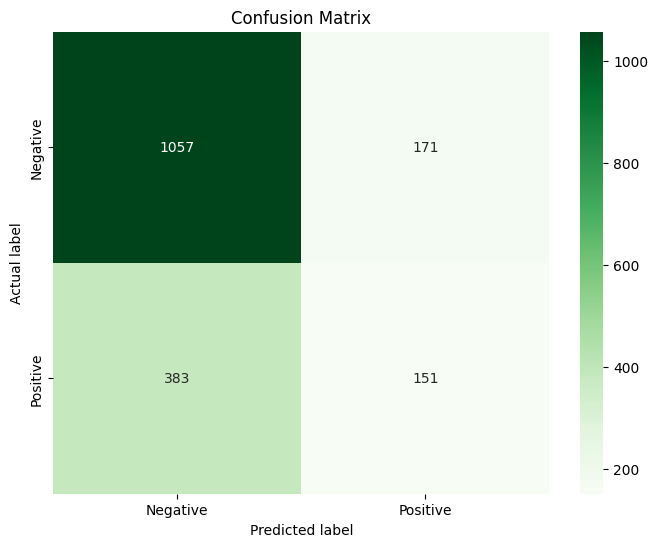

In [223]:
# Confusion Matrix 시각화

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])

plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

- ROC AUC Score

    - ROC 곡선은 FPR 이 변할 때 TPR 의 변화를 나타낸다.

    - 평가 지표는 ROC 곡선 면적에 기반한 AUC 값으로, AUC 값은 ROC 곡선 밑의 면적이며 일반적으로 1 에 가까울수록 좋은 수치이다.

<img src="https://postfiles.pstatic.net/MjAyNTAxMTRfOTIg/MDAxNzM2ODI3NTE1NzIx.dWDzrZmDN_-c2HktfxkSCl5ivKil4BcL-e2I8kAazdQg.xf2NO02RPVBl7PFtM20tmxLc48mZaSNErgB8HUM4EBcg.PNG/image.png?type=w773" width=50%>

In [224]:
# 평가 지표 - Precision
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

precision = precision_score(y_val, val_pred)
print("Precision: ", precision)

# 평가 지표 - Recall
recall = recall_score(y_val, val_pred)
print("Recall: ", recall)

# 평가 지표 - F1 Score
f1 = f1_score(y_val, val_pred)
print("F1 Score: ", f1)

# 평가 지표 - ROC AUC Score
roc_auc = roc_auc_score(y_val, val_pred)
print("ROC AUC Score: ", roc_auc)

Precision:  0.468944099378882
Recall:  0.28277153558052437
F1 Score:  0.352803738317757
ROC AUC Score:  0.5717603606241385


- Classification Report

    - support : 각 클래스의 실제 데이터 수

    - weighted avg : 클래스의 데이터 수를 고려한 평균

    - macro avg : 각 클래스별로 동일한 비중을 둔 평균

        - 클래스별 데이터 수가 다른 경우에는 weighted avg 가 더 의미있는 평가 지표가 될 수 있다.

In [225]:
# 모형 성능 평가 - 평가지표 계산
eval_report = metrics.classification_report(y_val, val_pred)
print(eval_report)

              precision    recall  f1-score   support

           0       0.73      0.86      0.79      1228
           1       0.47      0.28      0.35       534

    accuracy                           0.69      1762
   macro avg       0.60      0.57      0.57      1762
weighted avg       0.65      0.69      0.66      1762



In [226]:
# 특성 중요도 출력
features = pd.DataFrame(rf.feature_importances_, 
                        index=X_tr.columns, 
                        columns=['Importance'])
features = features.sort_values(by='Importance', ascending=False)

features

,Importance
age,0.239232
income_log,0.219620
fee,0.174611
term,0.149155
family,0.063608
payment,0.046877
package,0.034505
job,0.032386
gender,0.025267
married,0.013733


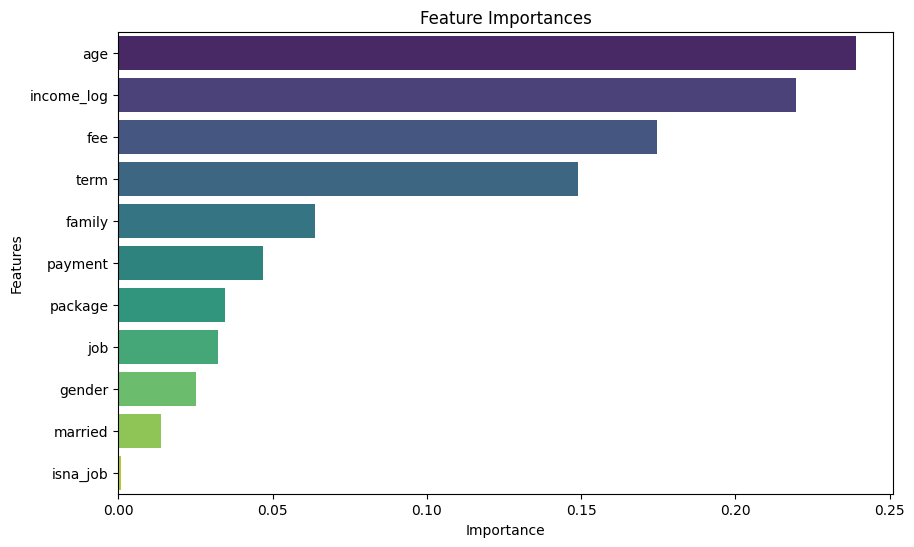

In [227]:
# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=features.Importance, y=features.index,
            hue=features.index, legend=False,
            palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

### 모델 성능 개선하기

### 변수 선택 
Feature Importance 분석에 따라, 가장 낮은 married, isna_job 열을 제외하고 분석

In [228]:
X_tr.columns

Index(['term', 'fee', 'married', 'gender', 'job', 'package', 'age', 'family',
       'payment', 'income_log', 'isna_job'],
      dtype='object')

In [229]:
selected_features = ['term', 'fee', 'job', 'package', 'age', 'family', 'payment', 'income_log']
X_tr_selected = X_tr.loc[:, selected_features].copy()
X_val_selected = X_val.loc[:, selected_features].copy()

### 최초 모델

In [230]:
model = RandomForestClassifier(max_depth=3, random_state=42) # 기본값으로 먼저 해보고 max_depth 를 조절 혹은 max_depth 를 낮은 값에서 시작
model.fit(X_tr_selected, y_tr)
val_pred = model.predict(X_val_selected)

# 평가 지표
print("정확도: %0.2f" % accuracy_score(y_val, val_pred))
print("정밀도: %0.2f" % precision_score(y_val, val_pred))
print("재현율: %0.2f" % recall_score(y_val, val_pred))
print("F1 스코어: %0.2f" % f1_score(y_val, val_pred))
print("ROC AUC: %0.2f" % roc_auc_score(y_val, val_pred))

정확도: 0.70
정밀도: 0.00
재현율: 0.00
F1 스코어: 0.00
ROC AUC: 0.50


In [231]:
y_tr.value_counts()

target
0    4908
1    2137
Name: count, dtype: int64

(array([4908.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2137.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

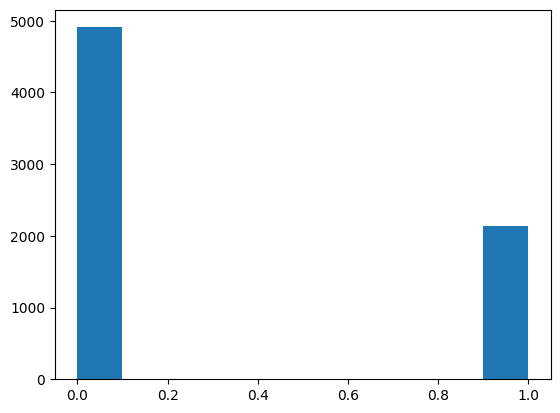

In [232]:
plt.hist(y_tr)

In [233]:
# 모형 성능 평가 - 평가지표 계산
eval_report = metrics.classification_report(y_val, val_pred)
print(eval_report)

              precision    recall  f1-score   support

           0       0.70      1.00      0.82      1228
           1       0.00      0.00      0.00       534

    accuracy                           0.70      1762
   macro avg       0.35      0.50      0.41      1762
weighted avg       0.49      0.70      0.57      1762



### 모델 파라미터 변경

In [234]:
model = RandomForestClassifier(
    n_estimators=100, # 100개의 Decision Tree
      max_depth=3, 
      class_weight='balanced', 
      random_state=42,
      )

model.fit(X_tr_selected, y_tr)
val_pred = model.predict(X_val_selected)

In [235]:
# 평가 지표
print("정확도: %0.2f" % accuracy_score(y_val, val_pred))
print("정밀도: %0.2f" % precision_score(y_val, val_pred))
print("재현율: %0.2f" % recall_score(y_val, val_pred))
print()

print("훈련 F1: %0.2f" % f1_score(y_tr, model.predict(X_tr_selected)))
print("검증 F1: %0.2f" % f1_score(y_val, val_pred))

print("훈련 AUC: %0.2f" % roc_auc_score(y_tr, model.predict(X_tr_selected)))
print("검증 AUC: %0.2f" % roc_auc_score(y_val, val_pred))

정확도: 0.58
정밀도: 0.40
재현율: 0.77

훈련 F1: 0.52
검증 F1: 0.53
훈련 AUC: 0.63
검증 AUC: 0.63


[[608 620]
 [122 412]]


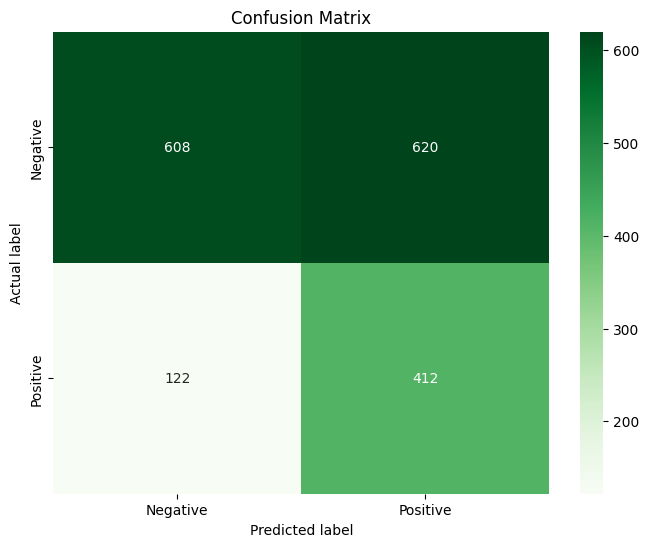

In [236]:
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics

cm = metrics.confusion_matrix(y_val, val_pred)
print(cm)

# Confusion Matrix 시각화

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])

plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [237]:
# 피처 스케일링
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_tr_scaled = scaler.fit_transform(X_tr_selected)
X_val_scaled = scaler.fit_transform(X_val_selected)

In [238]:
from sklearn.svm import SVC

model = SVC()

model.fit(X_tr_scaled, y_tr)
val_pred = model.predict(X_val_scaled)

In [239]:
# 평가 지표
print("정확도: %0.2f" % accuracy_score(y_val, val_pred))
print("정밀도: %0.2f" % precision_score(y_val, val_pred))
print("재현율: %0.2f" % recall_score(y_val, val_pred))
print()

print("훈련 F1: %0.2f" % f1_score(y_tr, model.predict(X_tr_selected)))
print("검증 F1: %0.2f" % f1_score(y_val, val_pred))

print("훈련 AUC: %0.2f" % roc_auc_score(y_tr, model.predict(X_tr_selected)))
print("검증 AUC: %0.2f" % roc_auc_score(y_val, val_pred))

정확도: 0.70
정밀도: 0.00
재현율: 0.00

훈련 F1: 0.00
검증 F1: 0.00
훈련 AUC: 0.50
검증 AUC: 0.50
